## Summary
**To earn clustering level 2:**

However, clustering is normally used as an unsupervised learning method, we used it in this assignment on a dataset including ground truth labels from assignment 7. We used the groundtruth labels for the validation process, by comparing the label of datapoints and clusters predicted for them. For this dataset we did not need to try different values of "k", since we already knew there are two clusters (two labels/possible predictions). 
In this analysis clustering grouped datapoints to two clusters which were equivalent to the two classes. In assignment 7 those classes were provided as labels for all samples. Therefore we considered clustering as an indirect way to classify datapoints to "benign" and "malignant" breast cancer.

Results were evaluated using two ways:
1. Using clustering metrics such as: 

    * silhouette_score,
    * adjusted_rand_score and
    * adjusted_mutual_info_score
    * Accuracy,
  
    
2. Visualization. For example by: 
    * Conducting an EDA (pairplots) to see the distributiona datapoints and correlation between attribuates.
    * Drawing scatter plot for both clusttered datapoints and ground truth label of datapoints and comparing them.

**To earn evaluation level 2:**
train-test splits was conducted on the dataset with different `train_size` (20%, 30%, … , 80% of whole dataset). Also metrics were evaluated to explain the function of kmeans model for each `train_size`.  

# Descriptin of Dataset
This dataset has 699 breast cancer samples. Each sample includes a code,  9 attributes and a target value as below.

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

This dataset was extracted from the UCI machine learning repository.Data has been gathered periodically between 1989 and 1991 in seveal groups.

[Reference](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)

## Loading Packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import graphviz 
from sklearn.cluster import KMeans

## Data Preparation

In [2]:
#We need to add headers to columns
col_names = ['Sample_code', 'Clump_Thickness ', 'Uniformity_Cell_Size', 'Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [3]:
#Reading dataset as a Pandas dataframe
df1 = pd.read_csv('data/breast_cancer_wisconsin.csv', names = col_names, index_col= 'Sample_code')

In [4]:
df1.head()

,Clump_Thickness,Uniformity_Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_code,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df1.shape

(699, 10)

### Cleaning Data

In [6]:
#dropping any rows with "?" parameter
df1 = df1[~(df1 == '?').any(axis=1)]

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


## EDA

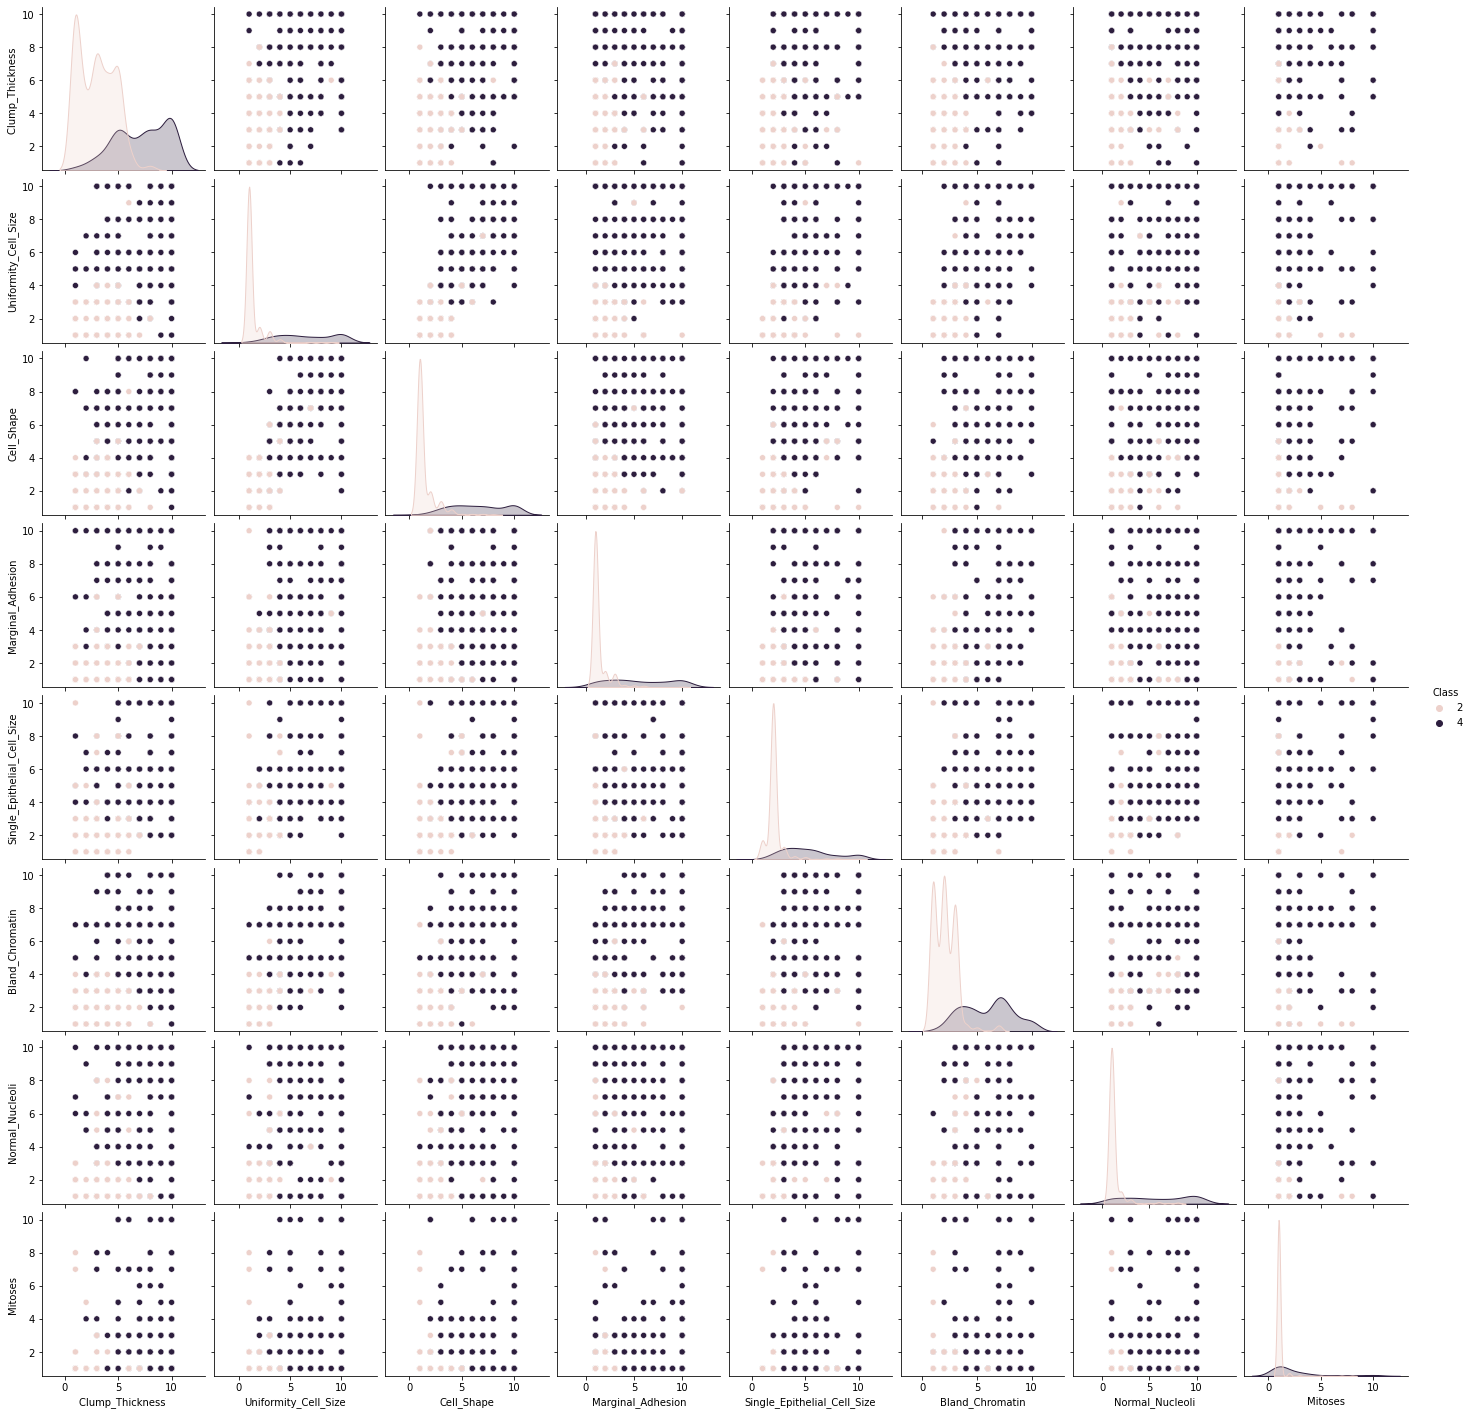

In [7]:
sns.pairplot(df1, hue = 'Class')

As we can see above datapoints are not seperated and dense, which is not a good point for accurate clusttering. However since all these plots are 2-D, we may not be able to confidently judge about that only considerinf pairplots, We can understand further by conducting clusttering and then evaluating relevant metrics and get help from other visualizations (e.g. by comparing clusters with ground truth labels).

scatter plot of two selected attributes ("Cell_Shape" and "Uniformity_Cell_Size") before clusttering. Later we will plot this again to see clusters (predicted labels) after training clusttering model.

Text(0, 0.5, 'Uniformity_Cell_Size')

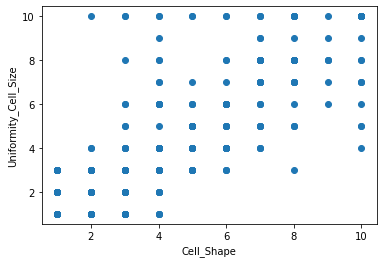

In [8]:
plt.scatter(df1['Cell_Shape'], df1['Uniformity_Cell_Size'])
plt.xlabel('Cell_Shape')
plt.ylabel('Uniformity_Cell_Size')

In [9]:
#ground truth labels
ground_truth_labels = df1['Class']

## Training on all attributes

In [10]:
#instantiating kmeans clustering object with two clusters
km2 = KMeans(n_clusters=2)
km2

KMeans(n_clusters=2)

In [11]:
#Training model on all 10 attributes
km2.fit(df1.values[:, :10])

KMeans(n_clusters=2)

In [12]:
#Number of iterations run
km2.n_iter_

7

training process of kmeans model stopped after 7 iterations which means cluster of no datapoint would change after the seventh iteration,  in the other words, model converged at 7th iteration. By the way model is allowed to continue iterations to `max_iter=300`.

In [13]:
#Sum of squared distances of samples to their closest cluster center
km2.inertia_

19420.83446828801

kmeans model by default tried 10 different centroid seed (`n_init=10`) to find the best result for clusterring considering the lowest inertia. Between those 10 trials "19420.83" was the lowest inertia for a specific centroid locations (two centroids for two clusters).
ALso, the lower the model inertia, the better the model fit. We can see that the model has very high inertia. So, it may be a potential sign that, this is not a perfect model fit to the data. We will clarify it by further analysis and using other metrics.

In [14]:
# cluster of points as an array of zeros and ones
labels2 = km2.labels_

In [15]:
#Replacing zero and one with 2 and 4, repectively, to have the same values for predicted and ground truth labels.
for n, i in enumerate(labels2):
    if i == 0:
        labels2[n] = 2
    elif i == 1:
        labels2[n] = 4

In [16]:
#number of correct predictions
num_correct_labels2 = sum(ground_truth_labels == labels2)

In [17]:
print("Result: %d out of %d samples were correctly labeled." % (num_correct_labels2, ground_truth_labels.size))

Result: 659 out of 683 samples were correctly labeled.


In [18]:
#calculating accuracy of kmeans model in predicting labels
accuracy2 = num_correct_labels2/ground_truth_labels.size 
accuracy2

0.9648609077598829

As we can see above number of correct labels is 659 (out of 683 total samples) which led to an accuracy of 0.965.

 In cases where we have a dataset labeled with classes (supervised clustering), like this dataset,  we can calculate a confusion_matrix and consequently precision, recall and f1-score.

In [19]:
print(confusion_matrix(df1['Class'],labels2))#we should replace 0 and 1 with benign and manignant
print(classification_report(df1['Class'],labels2))

[[435   9]
 [ 15 224]]
              precision    recall  f1-score   support

           2       0.97      0.98      0.97       444
           4       0.96      0.94      0.95       239

    accuracy                           0.96       683
   macro avg       0.96      0.96      0.96       683
weighted avg       0.96      0.96      0.96       683



AS we can understand from the confusion matrix 15+9=24 samples were predicted wrongly, which is compatible with our calculation of `num_correct_labels2` before.

 **Does this clustering work better or worse than expected based on the classification performance in assignment 7?**
 
**Precision:** Improved from 0.95 (optimum DT classifier) to 0.96 (kmeans clusterring).

**Recall:** Improved from 0.93 (optimum DT classifier) to 0.96 (kmeans clusterring).

**f1-score:** Improved from 0.94 (optimum DT classifier) to 0.96 (kmeans clusterring).

However these metrics show a very slight better performance of kmeans than decision tree on this countinuous dataset, they seem to perform preety close and could be neglected. Therefore according to these metrics, both models performed well on a countinius dataset like this, with high Precision, Recall and f1-score,

In [20]:
#Coordinates of cluster centers. 
centroids2 = km2.cluster_centers_
centroids2

array([[3.02888889, 1.28222222, 1.4       , 1.34222222, 2.08666667,
        1.30222222, 2.08666667, 1.24666667, 1.10444444, 2.06666667],
       [7.17167382, 6.75965665, 6.72103004, 5.70386266, 5.45064378,
        7.87553648, 6.06866953, 6.00429185, 2.56652361, 3.92274678]])

As we can see abve each centroid has 10 elements which stand for 10 attributes/dimentioans. But when it comes to visualization, we are only able to show centroids in 2 or 3 dimentions. That is a reason why visualization alone could not be a perfect criteria to judge performance of model and metrics would be helpful for a more mature intuition and judgment on a clusttering model.

Now let's visually compare the predicted classes using kmeans and ground truth labels. Also we visualize the location of centroids in each cluster which were calculated previsuously using 'km.cluster_centers_'.

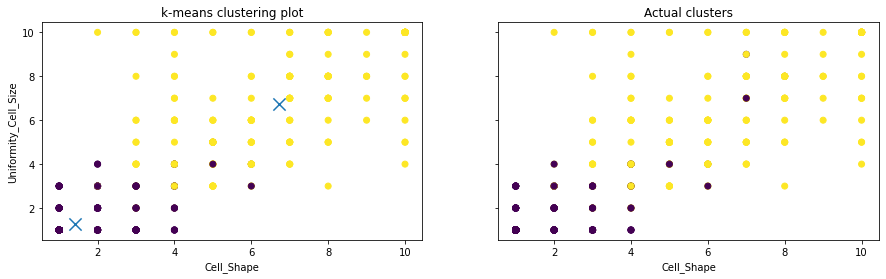

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4), sharey=True)
ax1.scatter(df1['Cell_Shape'], df1['Uniformity_Cell_Size'],c = labels2)
ax2.scatter(df1['Cell_Shape'], df1['Uniformity_Cell_Size'],c = df1['Class'])
ax1.set_xlabel('Cell_Shape')
ax2.set_xlabel('Cell_Shape')
ax1.set_ylabel('Uniformity_Cell_Size')
ax1.set_title('k-means clustering plot')
ax2.set_title('Actual clusters')
#plotting centroids
ax1.scatter(centroids2[:, 2],centroids2[:, 1], marker = "x", s = 150)

As we can see above the centroid of purple cluster does not look at the center. It roots at he same reason we discussed before. This centroid is the arithmetic mean of the cluster which is in fact a 10-D shape, simplifed here in 2-D for two of attributes.

In [22]:
#mean Silhouette Coefficient on all 10 attributes for the model trained on 10 attributes
metrics.silhouette_score(df1.values[:, :10], labels2)

0.5981214601589373

silhouette_score depends on both mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample (intra and inter similarity). The more dense and seperated clusters are, the higher silhouette_score will be (closer to 1). In this case silhouette_score = 0.598 is the result of some overlap between clusters and assigning incorrect cluster to some samples, as could be also confirmed by the above plots, as well. 

In [23]:
metrics.adjusted_rand_score(ground_truth_labels,labels2)

0.8629721881148718

 ARS is the measure of similarity between two clustering, then the relatively high value of ARS here confirms the similarity of predicted clusters (labels) to the ground truth labels. This result is compatible with high accuracy of model, previoudsly calculated.

In [24]:
#Adjusted Mutual Information between two clusterings.
metrics.adjusted_mutual_info_score(ground_truth_labels,labels2)

0.768151450318532

AMI is correlation for categorical values. In the other words, how similar are predicted and ground truth labels for these points. In this case, AMI is 0.768 which is relativelu high and shows similarity of predicted labels to ground truth labels. This actually is compatible with the other calculated metrics.
We could use AMI and ARS meterics just because we had ground truth labels for this dataset. In an unsupervised clustering we would not be able to judge based on these two metrics.

## Part 2: Test and Train Sizes


Now here we make a loop to train kmeans model using diffeent `train_size`, and find meterics them. 

In [25]:
train_pct=[]
silh = []
ARS = []
AMI = []

for train_size in range(2,9):
    train_size=train_size/10
    X_train, X_test, y_train, y_test = train_test_split (df1.values[:, :9].astype('int'),
                      df1.values[:, 9],train_size = train_size,random_state=0) 
    km2.fit(X_train)
    
    train_pct.append(train_size)
    silh.append(metrics.silhouette_score(X_test,km2.predict(X_test)))
    ARS.append(metrics.adjusted_rand_score(y_test,km2.predict(X_test)))
    AMI.append(metrics.adjusted_mutual_info_score(y_test,km2.predict(X_test)))

In [26]:
#final dictionary including all splits' results
d = {'train_pct' : train_pct, 'silh': silh, 'ARS': ARS, 'AMI': AMI}

In [27]:
#Making a dataframe from calculated metrics with different train_size
df_results = pd.DataFrame(data=d)

In [28]:
df_results.head(10)

,train_pct,silh,ARS,AMI
0,0.2,0.601270,0.836977,0.734392
1,0.3,0.607843,0.837722,0.732467
2,0.4,0.601718,0.812129,0.701502
3,0.5,0.591382,0.809247,0.700180
4,0.6,0.589194,0.777926,0.664410
5,0.7,0.584027,0.759705,0.646416
6,0.8,0.580037,0.751172,0.635020


Now we Plot `silhouette_score`, `adjusted_rand_score` and `adjusted_mutual_info_score` in one plot for all tried train_size to see the relationship between the #Plotting silhouette_score, adjusted_rand_score and adjusted_mutual_info_score in one plot for all tried `train_size`and metric scores.

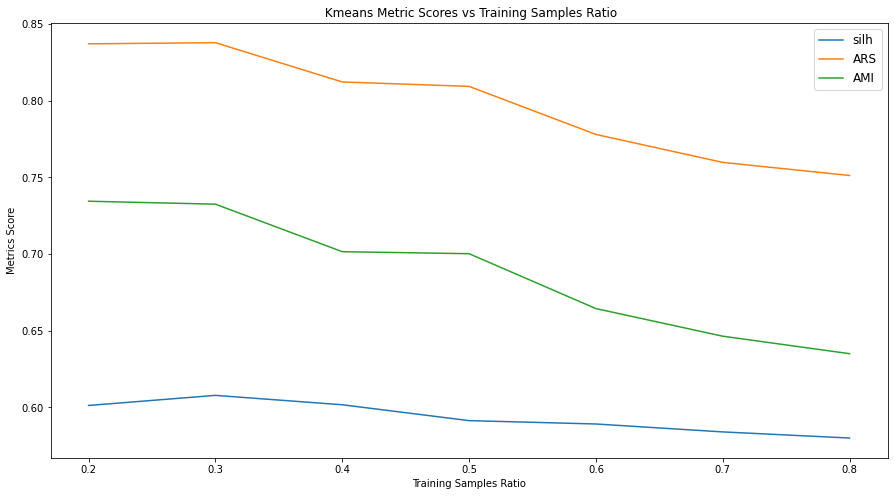

In [29]:
fig,ax = plt.subplots(figsize=(15,8))

ax.plot(df_results.train_pct,df_results.silh, label = 'silh')
ax.plot(df_results.train_pct,df_results.ARS, label = 'ARS')
ax.plot(df_results.train_pct,df_results.AMI, label = 'AMI')


ax.set_title(' Kmeans Metric Scores vs Training Samples Ratio')
ax.set_xlabel('Training Samples Ratio')
ax.set_ylabel('Metrics Score')

ax.legend(fontsize= 'large')

Three metrics of kmeans clustering model are drawn for different `train_size`. As could be infered from all three metrics, model deteriorates as the `train_size` increases. On the contrary, it was supposed that by increasing the `train_size` metrics improve.